# **Praprocesing data**


Cleaning Data

In [ ]:
#Import Library Yang Dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

#Import Data
df = pd.read_csv('StudentsPerformance.csv')

#Lihat sample data dan Info data
print('Sample 5 data teratas :\n',df.head())
print(20*'**')
print('Info data :\n',df.info())
print(20*'**','\n\n')

Sample 5 data teratas :
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 

Cek Missing Value dan Data Duplikat

In [ ]:
print('Cek Jumlah Missing Value pada setiap kolom :\n',df.isna().sum())
print(20*'**')
# Lihat Jumlah Duplicated Data
print('Jumlah Duplicated data :\n',df.duplicated().sum())

Cek Jumlah Missing Value pada setiap kolom :
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
****************************************
Jumlah Duplicated data :
 0


idak ada data yang kosong dan duplikat, kita dapat ke langkah selanjutnya yaitu menghapus outlier

Cek Outlier

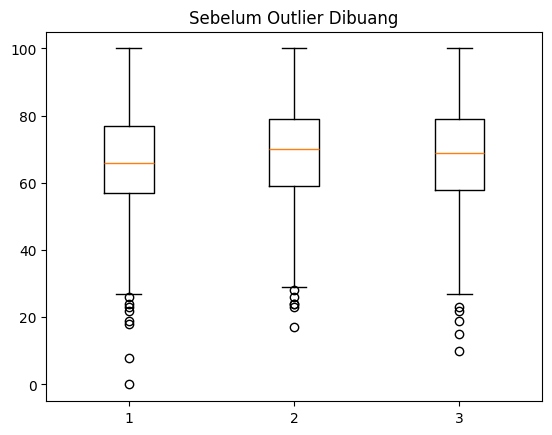

Jumlah Baris Sebelum Outlier dibuang: 1000
****************************************


In [ ]:
kolom_numerik = ['math score','reading score','writing score']
plt.boxplot(df[kolom_numerik])
plt.title('Sebelum Outlier Dibuang')
plt.show()

# Data Sebelum dibuang outliernya
print(f'Jumlah Baris Sebelum Outlier dibuang: {df.shape[0]}')
print(20*'**')

Jumlah Baris Sebelum Outlier dibuang: 1000

Buang Outlier

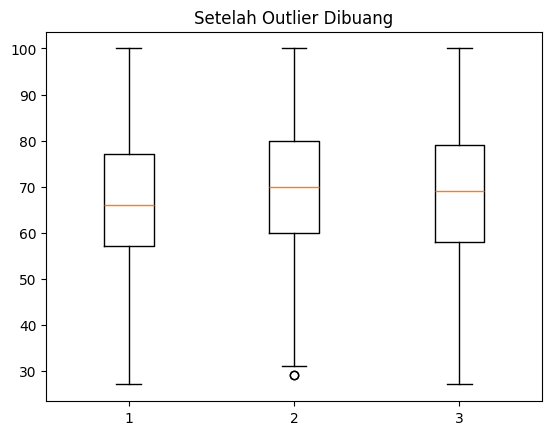

Jumlah Baris setelah outlier dibuang: 988


In [ ]:
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Cek outlier setelah dibuang
plt.boxplot(df[kolom_numerik])
plt.title('Setelah Outlier Dibuang')
plt.show()
print(f'Jumlah Baris setelah outlier dibuang: {df.shape[0]}')

Jumlah Baris setelah outlier dibuang: 988

In [ ]:
# Membuat Kolom baru bernama 'final score'
df['final score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
print('Data Setelah ditambah kolom baru',df.head())

#Save data yang sudah bersih
df.to_csv('peforma_cleaned.csv', index=False)

Data Setelah ditambah kolom baru    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   final score  
0    72.666667  
1    82.333333  
2    92.666667  
3    49.333333  
4    76.333333  


# **Visualisasi Data**

In [ ]:
# Import dan lihat sample data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('peforma_cleaned.csv')
print(df.head())
print(20*'**')

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   final score  
0    72.666667  
1    82.333333  
2    92.666667  
3    49.333333  
4    76.333333  
****************************************


Membuat Pie Chart per-kategori

Text(0.5, 1.0, 'lunch')

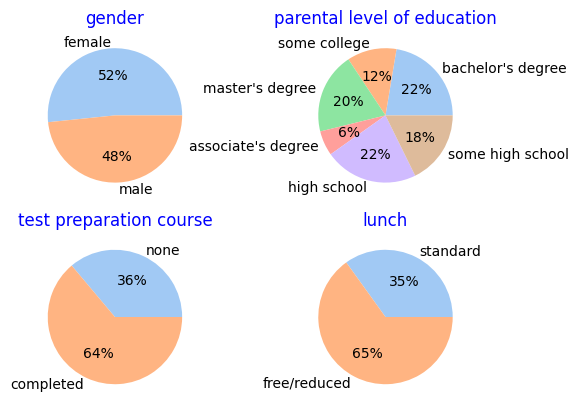

In [ ]:
plt.figure(1)
colors = sns.color_palette('pastel')
#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(df.groupby('gender').size(), labels =df['gender'].unique(), autopct='%.0f%%', colors=colors)
plt.title('gender', color='blue')
#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(df.groupby('parental level of education').size(), labels =df['parental level of education'].unique(), autopct='%.0f%%', colors=colors)
plt.title('parental level of education', color='blue')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(df.groupby('test preparation course').size(), labels =df['test preparation course'].unique(), autopct='%.0f%%', colors=colors)
plt.title('test preparation course', color='blue')
#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(df.groupby('lunch').size(), labels =df['lunch'].unique(), autopct='%.0f%%', colors=colors)
plt.title('lunch', color='blue')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

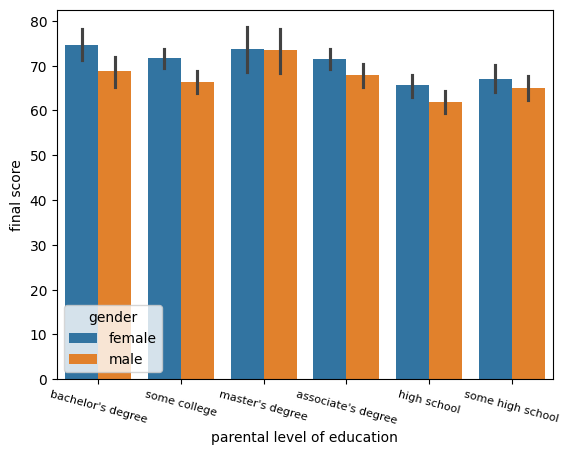

In [ ]:
plt.figure(2)
sns.barplot(data=df, x='parental level of education', hue='gender', y='final score')
plt.xticks(rotation=-15, fontsize=8)

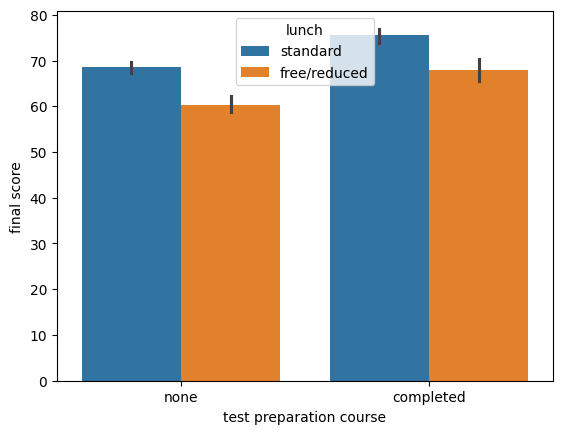

In [ ]:
plt.figure(3)
sns.barplot(data=df, x='test preparation course', hue='lunch', y='final score')
plt.show()

<Figure size 640x480 with 0 Axes>

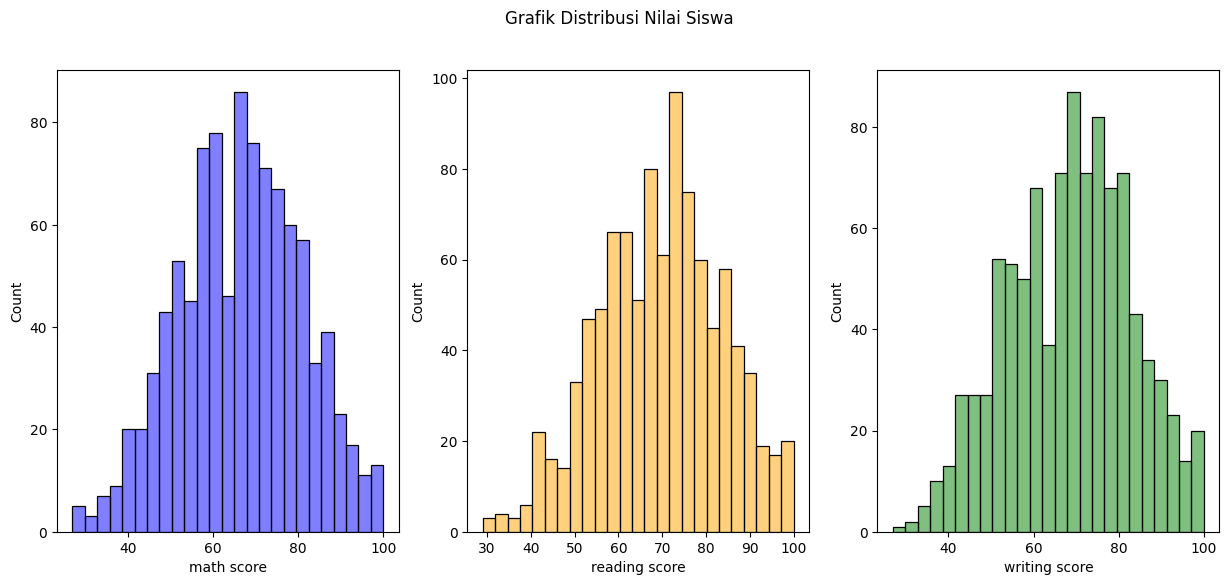

In [ ]:
#Histogram Nilai
plt.figure(4)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('Grafik Distribusi Nilai Siswa')
sns.histplot(df['math score'], color='blue', ax=ax[0], alpha=0.5, bins=25)
sns.histplot(df['reading score'], color='orange', ax=ax[1], alpha=0.5, bins=25)
sns.histplot(df['writing score'], color='green', ax=ax[2], alpha=0.5, bins=25)
plt.show()

In [ ]:
# Membuat Scatter Plot untuk masing masing score (math, reading, and writing)
import plotly.express as px
fig3 = px.scatter_3d(df, x='math score', y='reading score', z='writing score', color='gender', opacity=0.7)
fig3.show()

# **Clustering**

In [ ]:
from sklearn.cluster import KMeans

#Standarisasi
from sklearn.preprocessing import StandardScaler
kolom_numerik = ['reading score','writing score','math score']
for kolom in kolom_numerik:
    df[kolom]= StandardScaler().fit_transform(df[[kolom]])

# Label Encoding
from sklearn.preprocessing import LabelEncoder
kolom_kategorikal = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
for kolom in kolom_kategorikal:
    LE = LabelEncoder()
    df[kolom] = LE.fit_transform(df[kolom])
    print(LE.classes_)
    print(np.sort(df[kolom].unique()))
    print(20*'--')

['female' 'male']
[0 1]
----------------------------------------
['group A' 'group B' 'group C' 'group D' 'group E']
[0 1 2 3 4]
----------------------------------------
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
[0 1 2 3 4 5]
----------------------------------------
['free/reduced' 'standard']
[0 1]
----------------------------------------
['completed' 'none']
[0 1]
----------------------------------------


Mencari Jumlah Cluster Optimal

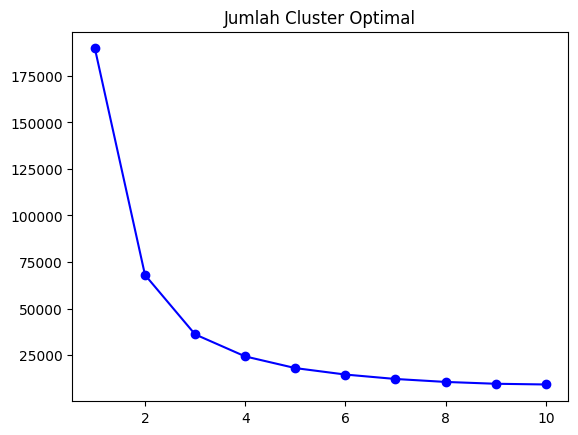

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.title('Jumlah Cluster Optimal')
plt.show()

In [ ]:
#Kolom Features
X = df[["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score","final score"]]

#Training Model
cluster_model = KMeans(n_clusters = 3, random_state = 24)
labels = cluster_model.fit_predict(X)

# Membuat Kolom baru bernama 'cluster',
df_final = df
df_final['cluster'] = labels
print(df_final['cluster'].head())

0    2
1    0
2    0
3    1
4    0
Name: cluster, dtype: int32


Membuat Kolom Keterangan Cluster

In [ ]:
# Membuat Kolom keterangan cluster
cluster_description = ({0 : 'Baik',
                        1 : 'Kurang',
                        2 : 'Cukup'})

df_final['cluster description'] = df_final['cluster'].map(cluster_description)
print(df_final[['cluster','cluster description']].head())

   cluster cluster description
0        2               Cukup
1        0                Baik
2        0                Baik
3        1              Kurang
4        0                Baik


In [ ]:
fig = px.scatter_3d(df_final, x = 'math score',
                    y = 'reading score',
                    z = 'writing score',
                    color = 'cluster description')
fig.show()

# **Menyimpan Model**

In [ ]:
import pickle
pickle.dump(cluster_model, open('k-means_model.pkl', 'wb'))


# **Memakai Model Yang Sudah Disimpan**

In [ ]:
#Membuat data baru
new_df = pd.DataFrame({'gender' : 'male',
           'race/ethnicity' : 'group C',
           'parental level of education' : "master's degree",
           'lunch' : 'standard',
           'test preparation course' : 'completed',
           'math score' : [90],
           'reading score' : [50],
           'writing score' : [67]})

#Membuat Fungsi preprocessing
def Preprocess(new_data):

    # Membuat Kolom rata-rata (final score)
    new_data['final score'] = new_data[['math score', 'reading score', 'writing score']].mean(axis=1)

    # Normalisasi
    new_data['math score'] = (new_data['math score'] - 66.6255060728745) / 14.409394002128439
    new_data['reading score'] = (new_data['reading score'] - 69.64068825910931) / 14.016759556402102
    new_data['writing score'] = (new_data['writing score'] - 68.56680161943319) / 14.525266777849469

    # Encoding
    gender_map = ({'female' : 0,
                   'male' : 1})
    race_map = ({'group A' : 0,
                 'group B' : 1,
                 'group C' : 2,
                 'group D' : 3,
                 'group E' : 4})
    parent_education = ({"associate's degree" : 0,
                         "bachelor's degree" : 1,
                         'high school' : 2,
                         "master's degree" : 3,
                         'some college' : 4,
                         'some high school' : 5})
    lunch_map = ({'free/reduced' : 0,
                  'standard' : 1})
    course_map = ({'completed' : 0,
                   'none' : 1})

    kolom_kategorikal = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
    mapping_ = [gender_map, race_map, parent_education, lunch_map, course_map]
    for kolom, my_map in zip(kolom_kategorikal, mapping_):
        new_data[kolom] = new_data[kolom].map(my_map)

    return new_data

# Preprocessing new_df dengan fungsi yang sudah dibuat
new_df = Preprocess(new_df)

print(new_df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       1               2                            3      1   

   test preparation course  math score  reading score  writing score  \
0                        0    1.622171      -1.401229      -0.107867   

   final score  
0         69.0  


In [ ]:
#Memanggil model yang sudah dibuat
kmeans_model = pickle.load(open('/content/k-means_model.pkl', 'rb'))

# **Melakukan Prediksi**

In [ ]:
#Lakuan prediksi
cluster = kmeans_model.predict(new_df)

if cluster == 0:
    print(f'Cluster {cluster}, Peforma Baik')
elif cluster == 1:
    print(f'Cluster {cluster}, Peforma Kurang')
elif cluster == 2:
    print(f'Cluster {cluster}, Peforma Cukup')

Cluster [2], Peforma Cukup


# **hirarki clustering**

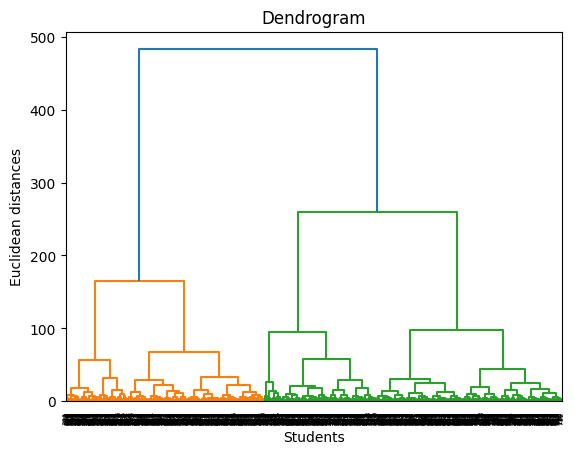

   cluster_hc cluster_hc_description
0           0                   Baik
1           0                   Baik
2           0                   Baik
3           2                  Cukup
4           0                   Baik


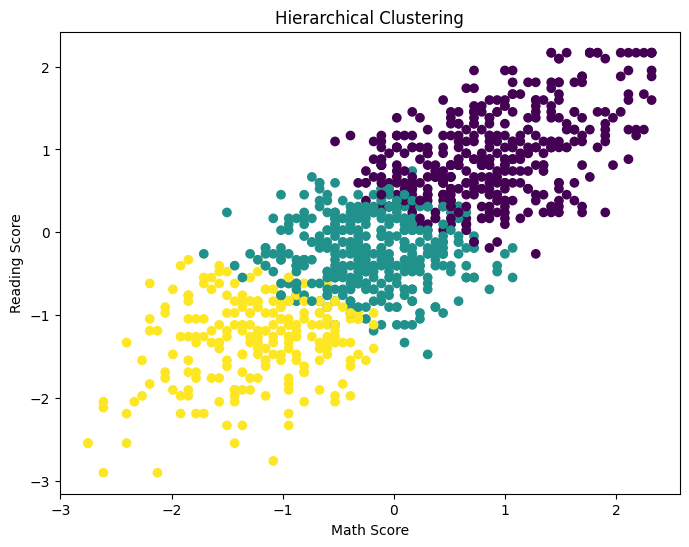

In [ ]:


import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load the preprocessed data
df_final = pd.read_csv('peforma_cleaned.csv')

# Feature scaling
kolom_numerik = ['reading score', 'writing score', 'math score']
for kolom in kolom_numerik:
    df_final[kolom] = StandardScaler().fit_transform(df_final[[kolom]])

# Label encoding
kolom_kategorikal = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for kolom in kolom_kategorikal:
    LE = LabelEncoder()
    df_final[kolom] = LE.fit_transform(df_final[kolom])

# Select features for clustering
X = df_final[["gender", "race/ethnicity", "parental level of education", "lunch",
              "test preparation course", "math score", "reading score", "writing score", "final score"]]

# Determine optimal number of clusters using dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # You can change the linkage method
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()


#Perform hierarchical clustering (example with 3 clusters)
n_clusters = 3 # Choose the number of clusters based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') # Remove affinity='euclidean'
labels_hc = hc.fit_predict(X)

# Add cluster labels to the DataFrame
df_final['cluster_hc'] = labels_hc

# Create cluster descriptions (adjust as needed based on your data)
cluster_description_hc = {0: 'Baik', 1: 'Kurang', 2: 'Cukup'}
df_final['cluster_hc_description'] = df_final['cluster_hc'].map(cluster_description_hc)


# Print and visualize the results
print(df_final[['cluster_hc', 'cluster_hc_description']].head())

# Visualization (example using a 2D scatter plot)
plt.figure(figsize=(8,6))
plt.scatter(df_final['math score'], df_final['reading score'], c=df_final['cluster_hc'], cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

In [ ]:

# Example of how to save the model (optional)
import pickle
pickle.dump(hc, open('hierarchical_clustering_model.pkl', 'wb'))